In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

from scipy import optimize

In [2]:
filename = "latency.dat"
trial, message_size, time = np.loadtxt(filename, unpack=True)

In [3]:
def model(size, t_0, a):
    return t_0 + a*size

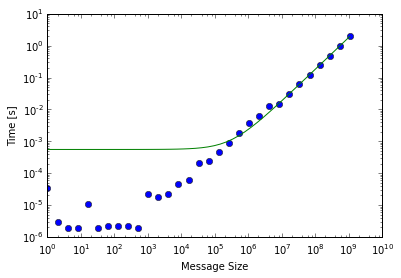

In [4]:
params_0 = (time[0], time[-1] / message_size[-1])

popt, pcov = optimize.curve_fit(model, message_size, time, p0=params_0)

plt.plot(message_size, time,
        linestyle = "",
        marker = "o",
        label = "data",
        )

_sizes = np.logspace(np.log10(message_size.min()), np.log10(message_size.max()), base=10.)
plt.plot(_sizes, model(_sizes, *popt), label="fit")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Message Size")
plt.ylabel("Time [s]")

In [5]:
def log10_model(*args):
    return np.log10(model(*args))

/Users/egentry/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


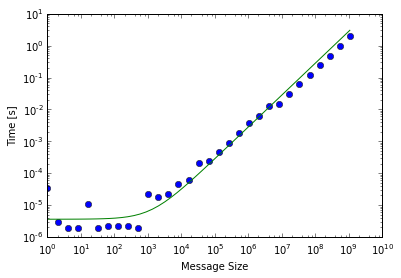

In [6]:
params_0 = (time[0], time[-1] / message_size[-1])

popt, pcov = optimize.curve_fit(log10_model, message_size, np.log10(time), p0=params_0)

plt.plot(message_size, time,
        linestyle = "",
        marker = "o",
        label = "data",
        )

_sizes = np.logspace(np.log10(message_size.min()), np.log10(message_size.max()), base=10.)
plt.plot(_sizes, model(_sizes, *popt), label="fit")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Message Size")
plt.ylabel("Time [s]")